## Part 1 - Create a single price path.

In [1]:
import numpy as np


def price_path(spot, r, sigma, T, num_steps):
    
    dt = T / num_steps
        
    drift = (r - 0.5 * sigma ** 2 ) * dt
    vol = sigma * np.sqrt(dt)
    
    simulated_returns = np.random.normal(0.0, 1.0, num_steps)
    simulated_returns = simulated_returns * vol
    simulated_returns = simulated_returns + drift
    
    returns_cum = np.append([0.0], [simulated_returns])  
    
    returns_cum = np.cumsum(returns_cum)
    returns_cum = np.exp(returns_cum)
    prices = spot*returns_cum
    
    
    
    return prices


## Part 2 - Create a chart with 100 price paths

* spot = 100
* r = 0.05
* sigma = 0.15
* T = 1.0
* num_steps = 252


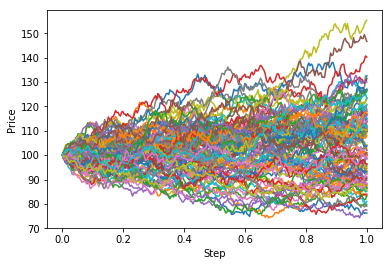

In [3]:
import matplotlib.pyplot as plt
import numpy as np

steps = np.linspace(0, 1.0, 252 + 1)

for i in range(100):
    y = price_path(100, 0.05, 0.15, 1.0, 252) 
    plt.plot(steps, y)
plt.xlabel("Step")
plt.ylabel("Price")
plt.show()

## Part 3 - Create an RKO valuation function that returns the __discounted__ exercise value for a single price path

In [4]:
def rko_path_value(spot, strike, barrier, r, sigma, T, num_steps):
    vl = price_path(spot, r, sigma, T, num_steps) 
    max_price = np.max(vl)
    if max_price >= barrier:
        return 0
    return max(vl[-1] - strike, 0)*np.exp(-r*T)

## Part 4 - Create an RKO value estimate function that returns the estimated value of the RKO for a specified number of price paths


In [5]:
def estimate_rko_value(spot, strike, barrier, r, sigma, T, num_steps, num_sims):
    sum_rko=0
    for i in range(num_sims):
        sum_rko += rko_path_value(spot, strike, barrier, r, sigma, T, num_steps)
    sum_rko_final = sum_rko / num_sims
    
    return  sum_rko_final

## Part 5 - Explore RKO value for a range of spots

Assume that we have an RKO with the following characteristics:
* T = 0.5 years
* Strike = 100
* Barrier = 110
* Sigma = 0.30
* Risk-Free Rate (r) = 0.05


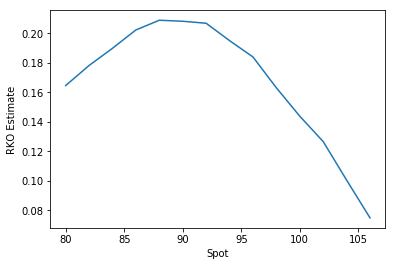

In [6]:
import numpy as np
import matplotlib.pyplot as plt


x_axis = np.linspace(80, 106, int((106 - 80) / 2+1))
y_axis=[0.0]*len(x_axis)

for i in range(len(x_axis)):
    y_axis[i] = estimate_rko_value(x_axis[i], 100, 110, 0.05, 0.30, 0.5, 126, 100000)
        
plt.plot(x_axis, y_axis)
plt.xlabel("Spot")
plt.ylabel("RKO Estimate")

plt.show()

## Part 6 - Explore RKO value for a range of maturities

Assume that we have an RKO with the following characteristics:
* Spot = 105
* Strike = 100
* Barrier = 110
* Volatility = 0.30
* Risk-Free Rate (r) = 0.05


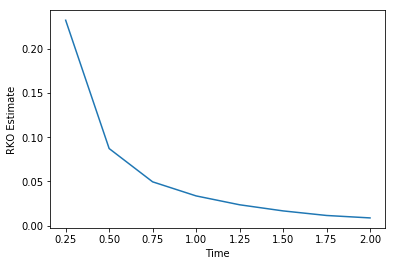

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math

x_axis = np.linspace(0.25, 2, int((2 - 0.25) / 0.25+1))

y_axis=[0.0]*len(x_axis)

for i in range(len(x_axis)):
    y_axis[i] = estimate_rko_value(105, 100, 110, 0.05, 0.30, x_axis[i], math.ceil(x_axis[i]*252.0), 50000)
  
plt.plot(x_axis, y_axis)
plt.xlabel("Time")
plt.ylabel("RKO Estimate")
    
plt.show()  


## Part 7 - Create a dataframe with RKO values for different spots and maturities

For the maturities and spots below, estimate the value of an RKO with the following characteristics and simulation parameters:
* Strike = 50
* Barrier = 60
* Sigma = 0.25
* Risk-Free Rate (r) = 0.01
* Num Time Steps = ceil(T * 252)
* Num Sims = 50000


In [8]:
import pandas as pd 
maturities = np.arange(0.25, 1.51, 0.25)
spots = np.arange(30.0, 60.1, 5.0)
dictionary={}

for i in range(len(maturities)):
    dictionary[maturities[i]]=[]
    for j in range(len(spots)):
        dictionary[maturities[i]].append(estimate_rko_value(spots[j], 50, 60, 0.01, 0.25, maturities[i], math.ceil(maturities[i]*252.0), 50000))
print(pd.DataFrame.from_dict(dictionary, orient='index',columns=spots))


          30.0      35.0      40.0      45.0      50.0      55.0  60.0
0.25  0.000000  0.004105  0.075621  0.508667  1.304447  1.387981   0.0
0.50  0.003366  0.050159  0.232080  0.589421  0.809355  0.622797   0.0
0.75  0.019723  0.105340  0.290772  0.494992  0.555858  0.382900   0.0
1.00  0.038160  0.136471  0.294696  0.396145  0.397029  0.258026   0.0
1.25  0.052889  0.147953  0.264779  0.333570  0.305453  0.185702   0.0
1.50  0.071846  0.156748  0.241024  0.275387  0.240803  0.143597   0.0
